<a href="https://colab.research.google.com/github/nolfflogan/Logan-Nolff-Project-Portfolio/blob/Master/TRAVEL_PACKAGE_PURCHASE_PRED_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
!pip3 install xgboost
from xgboost import XGBClassifier

# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/tour.csv')

In [ ]:
data.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
data.tail(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [ ]:
data.shape

(4888, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [ ]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [ ]:
data=data.drop('CustomerID',axis=1)

In [ ]:
data.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

#DATA PREPROCESSING

checking for anomalous/repetitve values

In [ ]:
#Making a list of all categorical variables
cat_col=['TypeofContact', 'CityTier','Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
--------------------------------------------------
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
--------------------------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------

In [ ]:
#Replacing 'Fe Male' with 'Female'
data.Gender=data.Gender.replace('Fe Male', 'Female')

In [ ]:
#Converting the data type of each categorical variable to 'category'
for column in cat_col:
    data[column]=data[column].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4843 non-null   category
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [ ]:
df = data.copy()

#EDA ANALYSIS

**univariate analysis**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

**HISTOGRAM**

#AGE

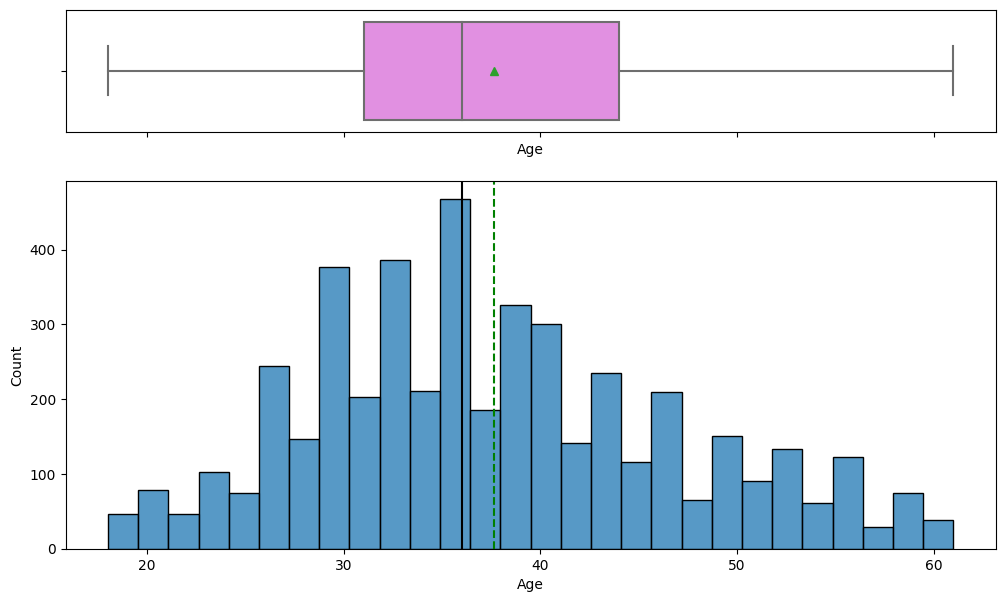

In [ ]:
histogram_boxplot(df, "Age")

#DURATION OF PITCH

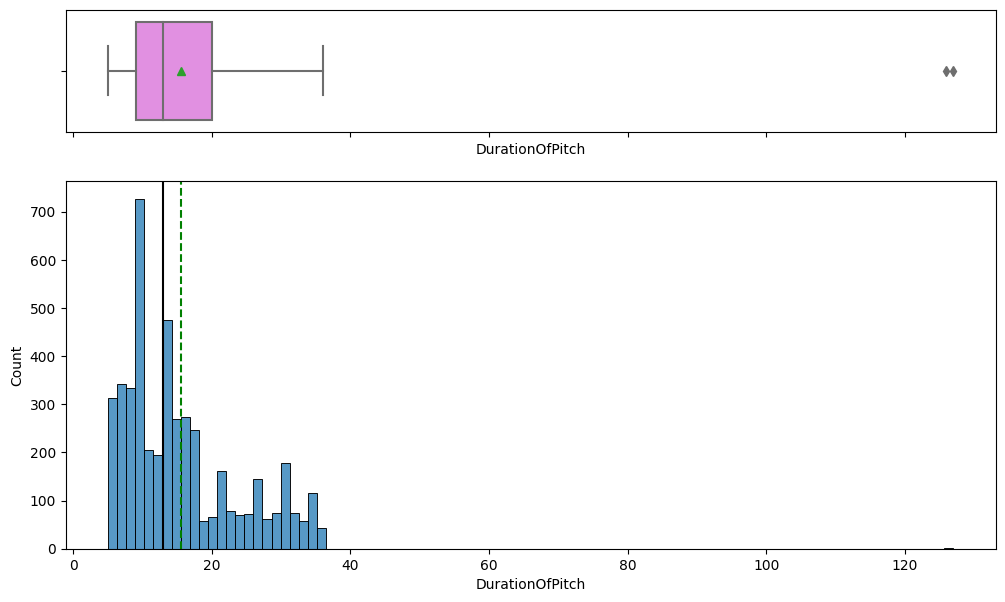

In [ ]:
histogram_boxplot(df, "DurationOfPitch")

#MONTHLY INCOME

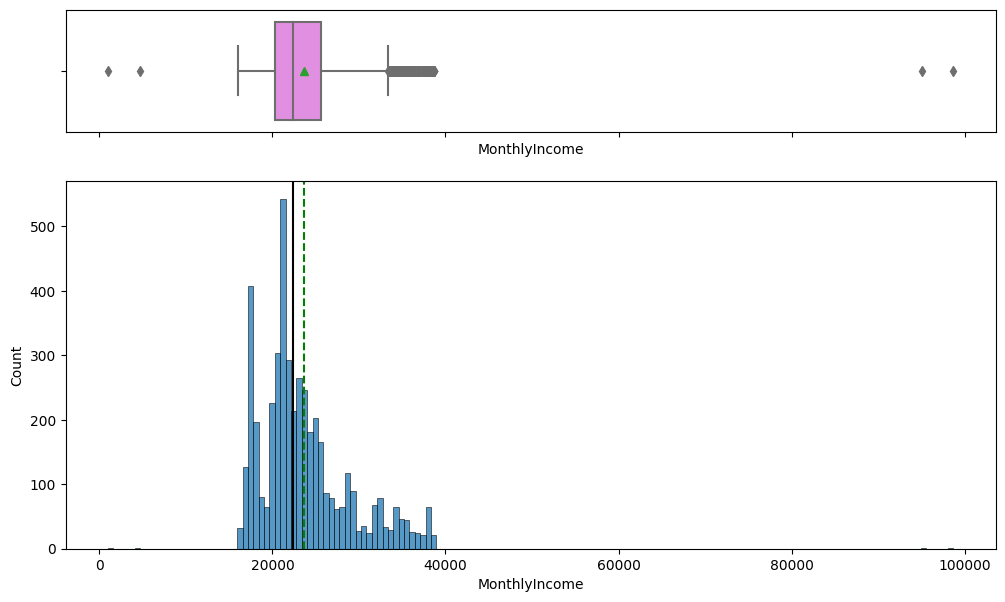

In [ ]:
histogram_boxplot(df, "MonthlyIncome")

#NUMBER OF TRIPS

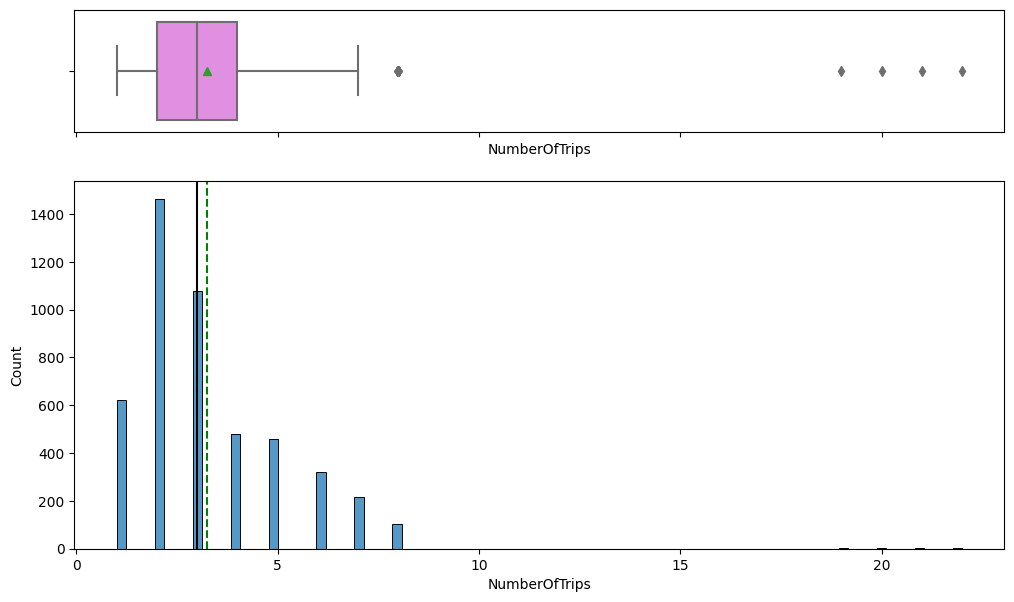

In [ ]:
histogram_boxplot(df, "NumberOfTrips")

**LABELED BARPLOT**

#NUMBER OF PERSON VISITNG

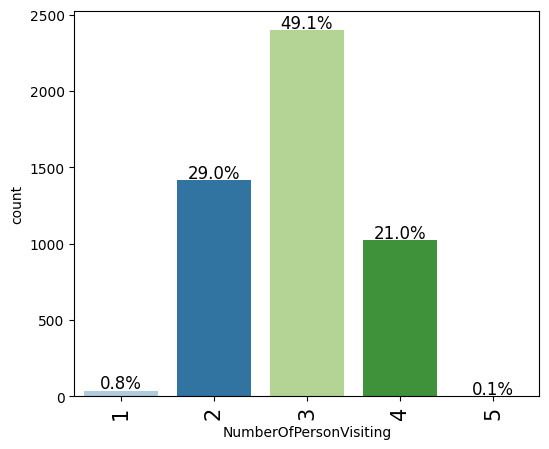

In [ ]:
labeled_barplot(df, "NumberOfPersonVisiting", perc=True)

#OCCUPATION

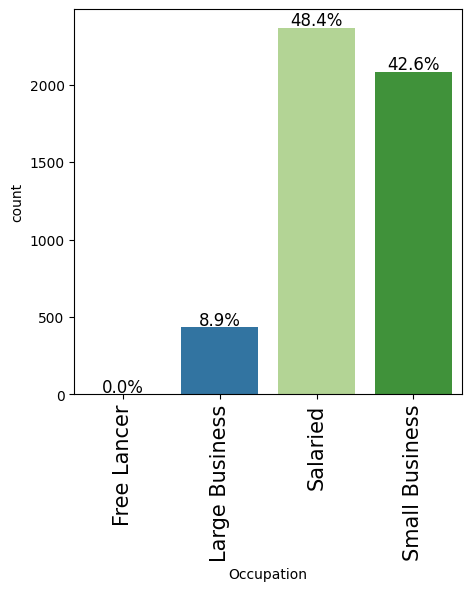

In [ ]:
labeled_barplot(df, "Occupation", perc=True)

#CITY TIER

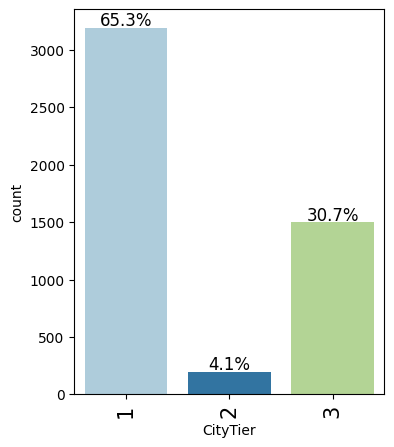

In [ ]:
labeled_barplot(df, "CityTier", perc=True)

#GENDER

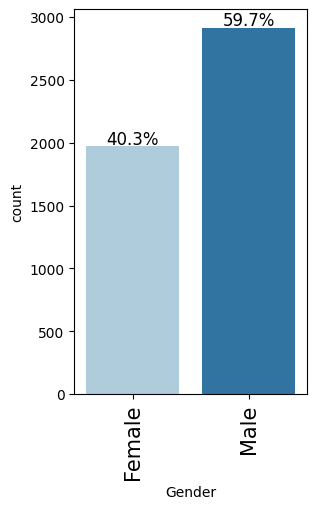

In [ ]:
labeled_barplot(df, "Gender", perc=True)

#NUMBER OF FOLLOW UPS

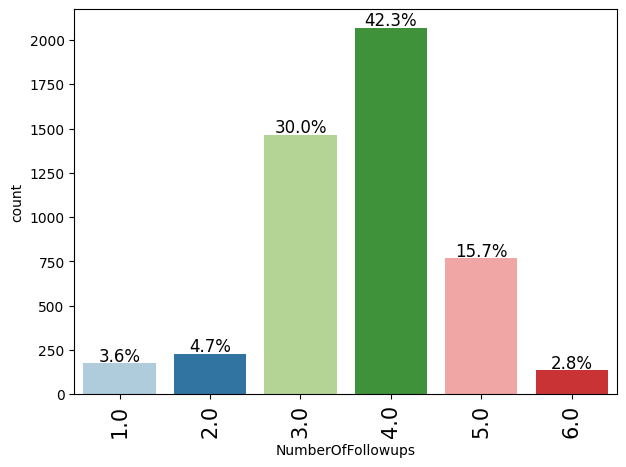

In [ ]:
labeled_barplot(df, "NumberOfFollowups", perc=True)

#PRODUCT PTCHED

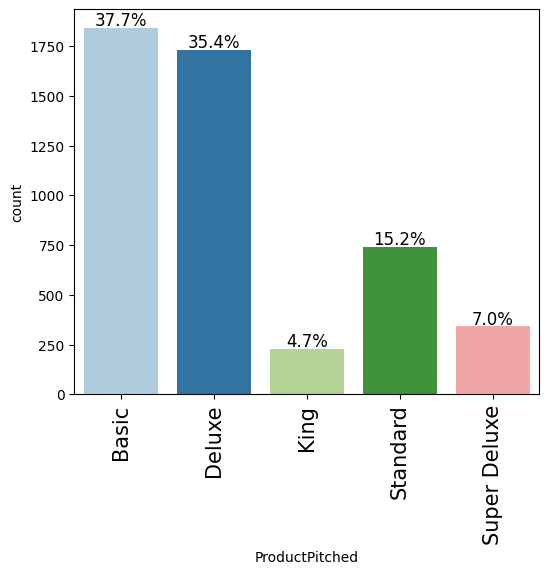

In [ ]:
labeled_barplot(df, "ProductPitched", perc=True)

#PREFERRED PROPERTY STAR

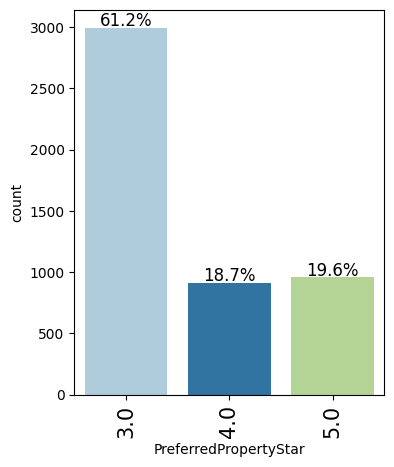

In [ ]:
labeled_barplot(df, "PreferredPropertyStar", perc=True)

#TYPE OF CONTACT

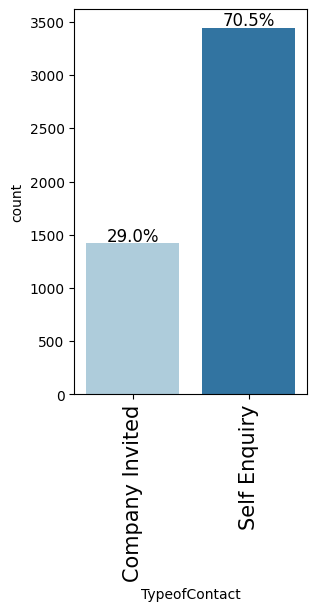

In [ ]:
labeled_barplot(df, "TypeofContact", perc=True)

#MARITAL STATUS

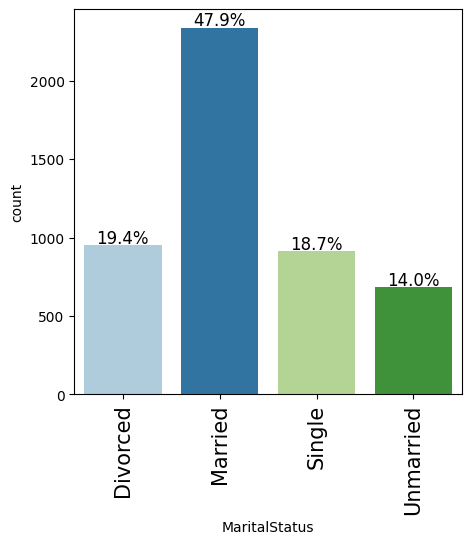

In [ ]:
labeled_barplot(df, "MaritalStatus", perc=True)

#PASSPORT

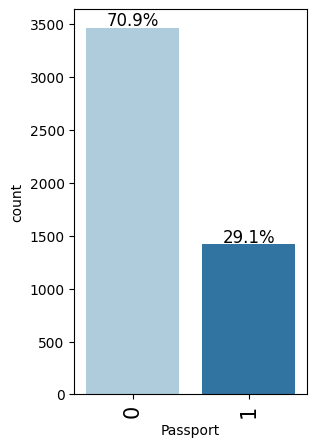

In [ ]:
labeled_barplot(df, "Passport", perc=True)

#PITCH SATISFACTION SCORE

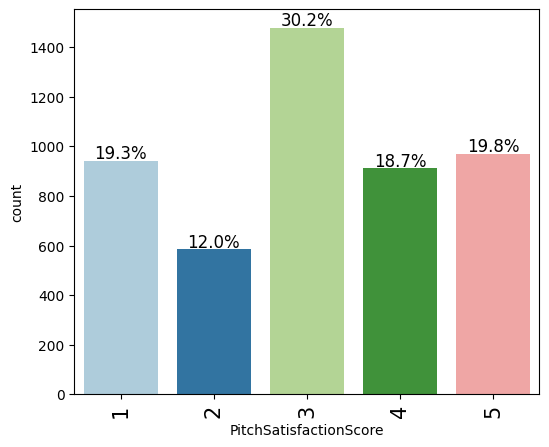

In [ ]:
labeled_barplot(df, "PitchSatisfactionScore", perc=True)

#DESIGNATION

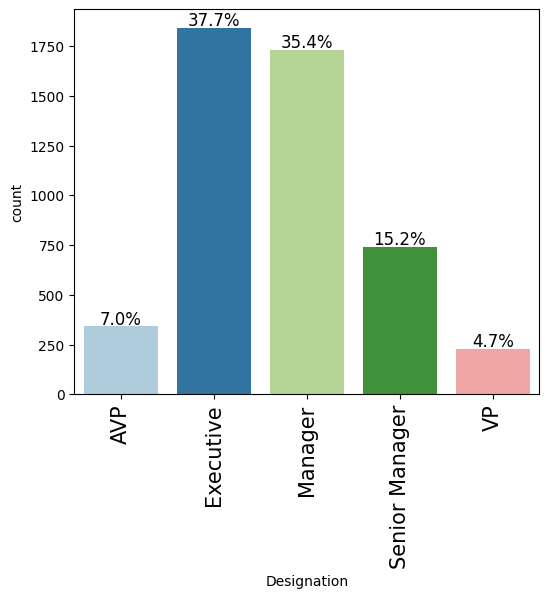

In [ ]:
labeled_barplot(df, "Designation", perc=True)

#NUMBER OF CHILDREN VISITING

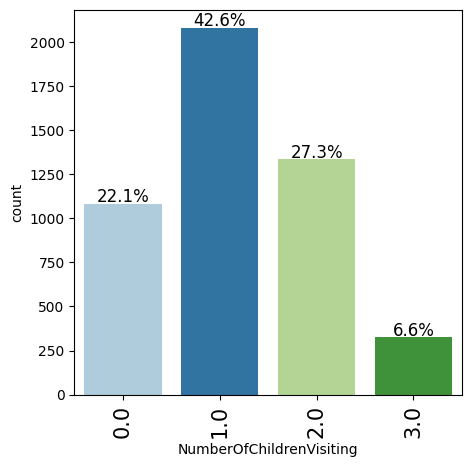

In [ ]:
labeled_barplot(df, "NumberOfChildrenVisiting", perc=True)

#PRODUCT TAKEN

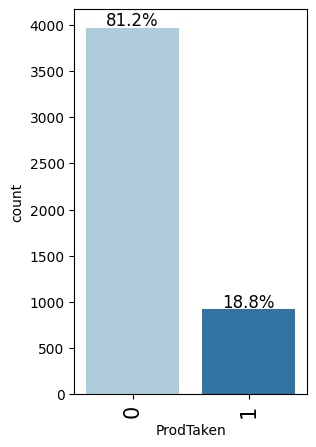

In [ ]:
labeled_barplot(df, "ProdTaken", perc=True)

#**BIVARIATE ANALYSIS**

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(loc="lower left",frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**CORRELATION CHECK**

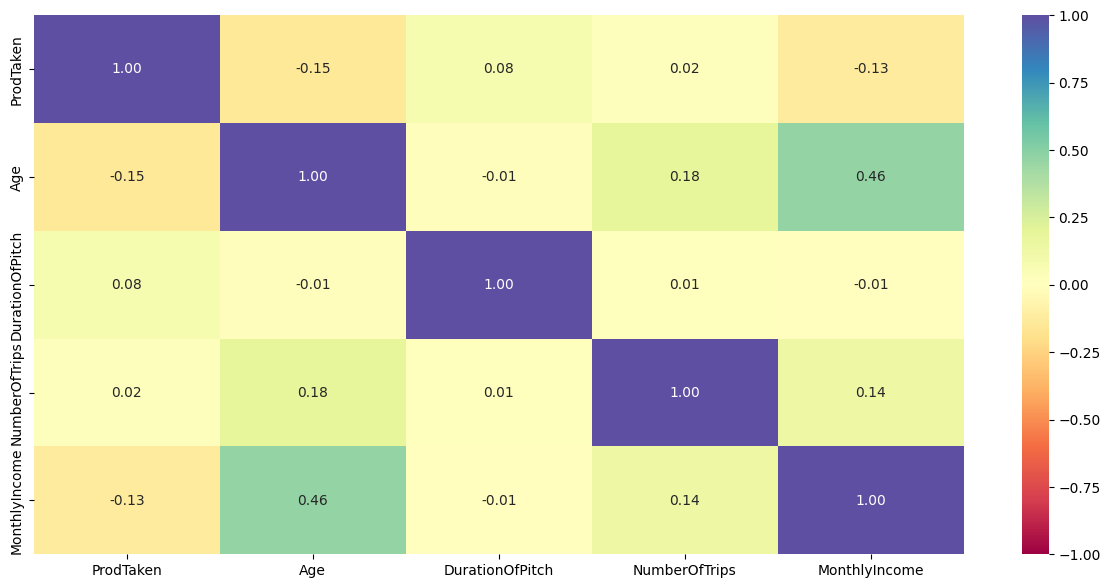

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

#PROD TAKEN V NUMBER OF PERSON VISITING

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


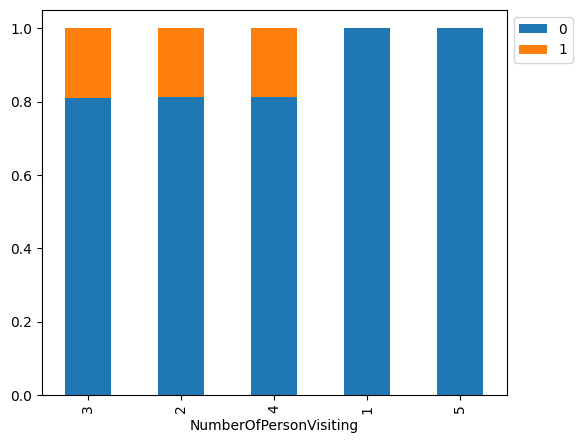

In [ ]:
stacked_barplot(df, "NumberOfPersonVisiting", "ProdTaken" )

#PROD TAKEN V NUMBER OF FOLLOW UPS

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


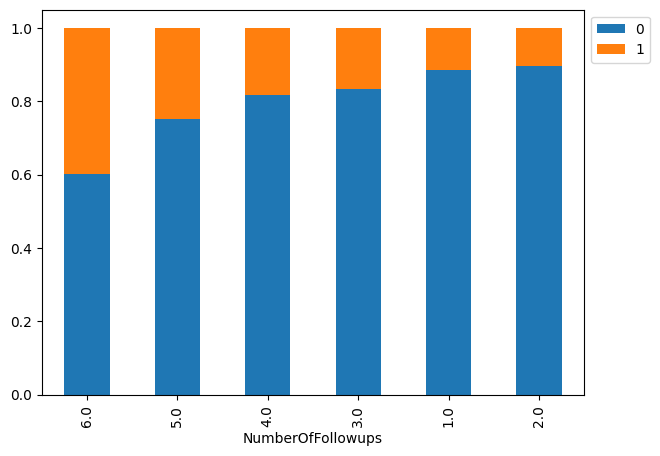

In [ ]:
stacked_barplot(df, "NumberOfFollowups", "ProdTaken" )

#PROD TAKEN V OCCUPATION

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


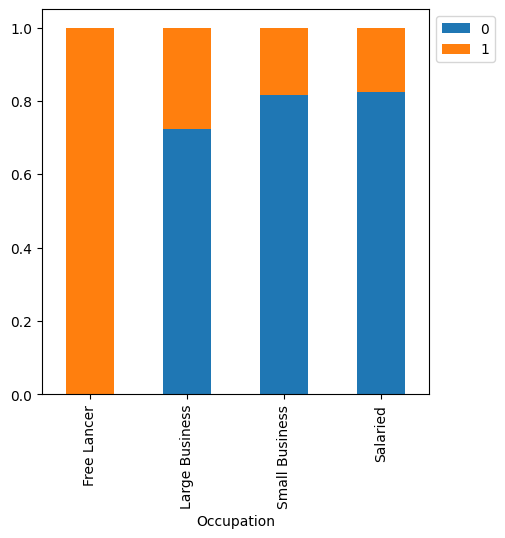

In [ ]:
stacked_barplot(df, "Occupation", "ProdTaken" )

#PROD TAKEN V MARITAL STATUS

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


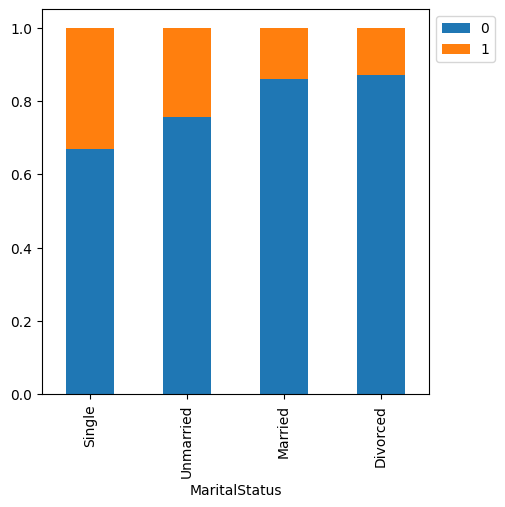

In [ ]:
stacked_barplot(df, "MaritalStatus", "ProdTaken" )

#PROD TAKEN V PASSPORT

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


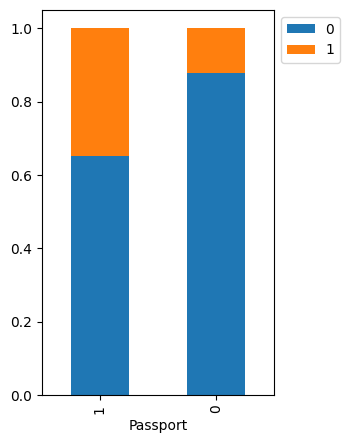

In [ ]:
stacked_barplot(df, "Passport", "ProdTaken" )

#PROD TAKEN V PRODUCT PITCHED

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


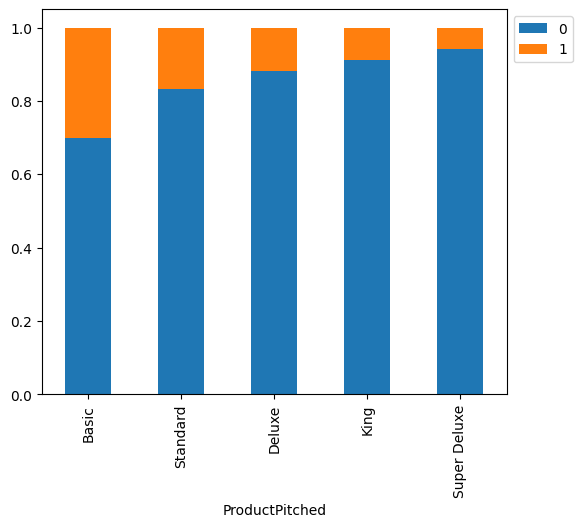

In [ ]:
stacked_barplot(df, "ProductPitched", "ProdTaken" )

#PROD TAKEN V DESIGNATION

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


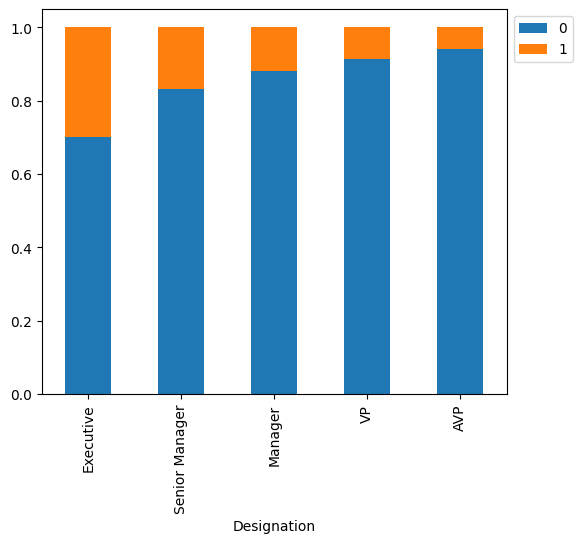

In [ ]:
stacked_barplot(df, "Designation", "ProdTaken" )

**BOXPLOT**

#PROD TAKEN V DURATION OF PITCH

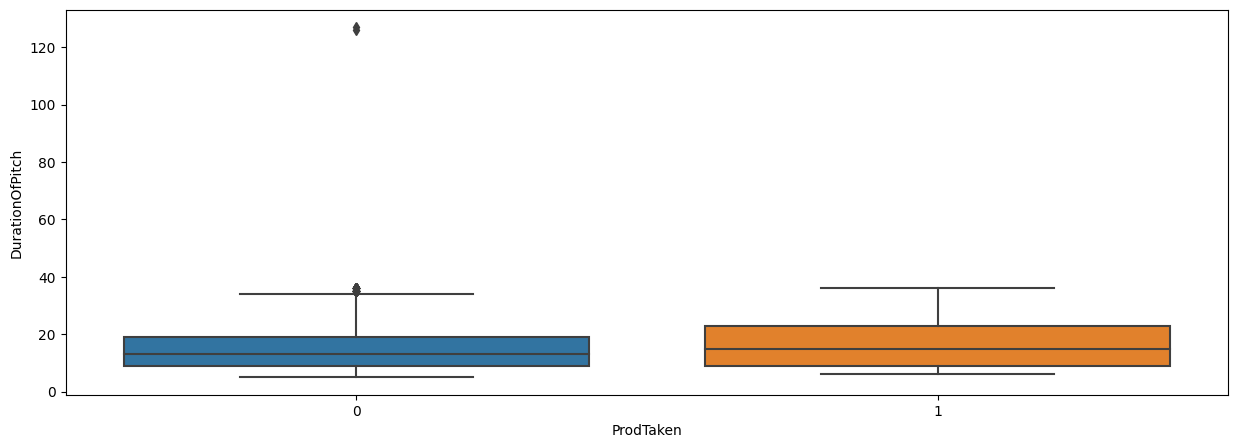

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='DurationOfPitch',x='ProdTaken',data=df)
plt.show()

#PROD TAKEN V MONTHLY INCOME

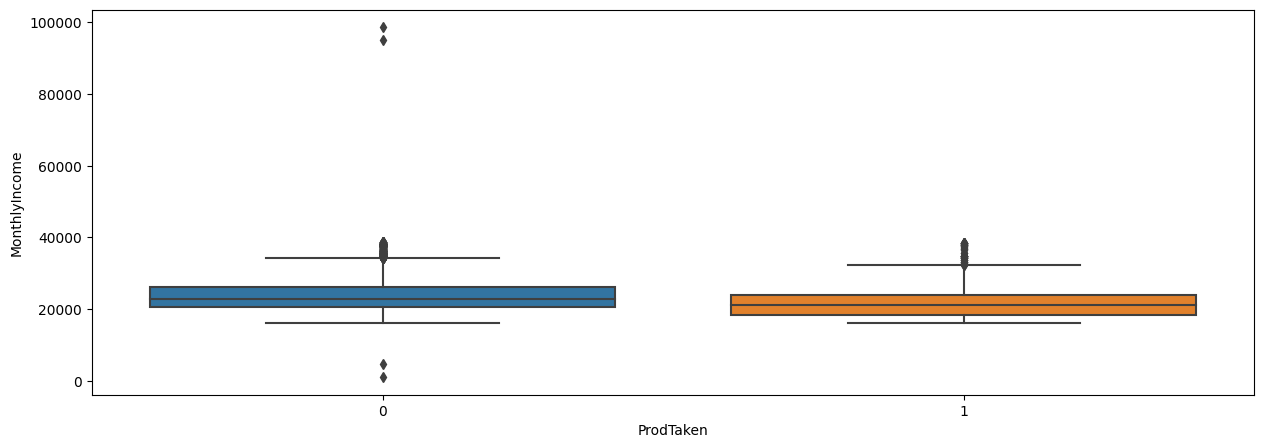

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='MonthlyIncome',x='ProdTaken',data=df)
plt.show()

#PROD TAKEN V MONTHLY INCOME V DESIGNATION

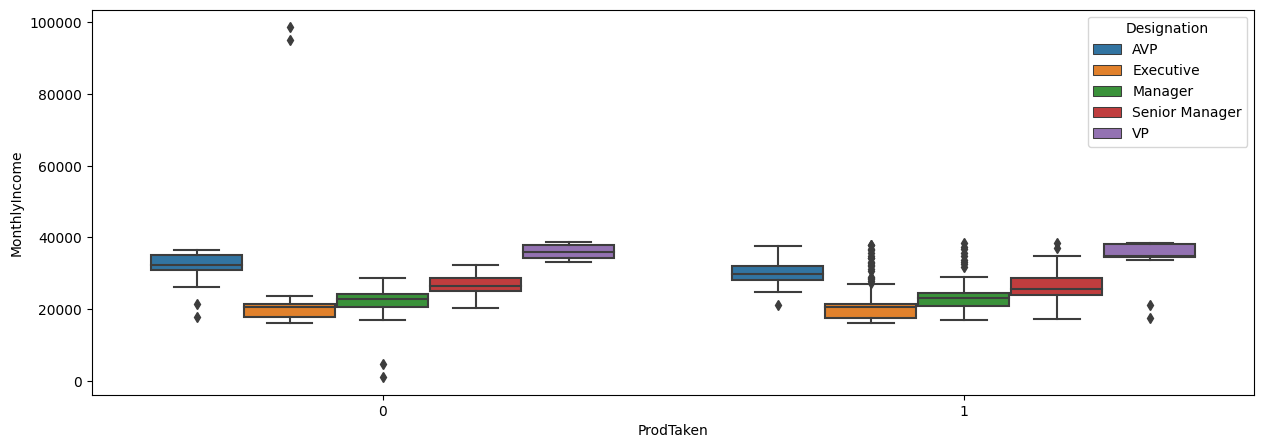

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='MonthlyIncome',x='ProdTaken', hue='Designation',data=df)
plt.show()

#***CUSTOMER PROFILES BY TRAVEL PACKAGE***

In [ ]:
data[(data['ProductPitched']=='Basic') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,552.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,515.0,NaN,NaN,NaN,31.28932,9.070829,18.0,25.0,30.0,35.0,59.0
TypeofContact,549,2,Self Enquiry,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,552.0,3.0,1.0,392.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,532.0,NaN,NaN,NaN,15.791353,7.906926,6.0,9.0,14.0,22.0,36.0
Occupation,552,4,Salaried,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,552,2,Male,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,552.0,3.0,3.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,548.0,6.0,4.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,552,1,Basic,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data[(data['ProductPitched']=='Standard') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,124.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,123.0,NaN,NaN,NaN,41.00813,9.876695,19.0,33.0,38.0,49.0,60.0
TypeofContact,124,2,Self Enquiry,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,124.0,3.0,3.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,123.0,NaN,NaN,NaN,19.065041,9.048811,6.0,11.0,17.0,29.0,36.0
Occupation,124,3,Small Business,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,124,2,Male,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,124.0,3.0,3.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,124.0,6.0,4.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,124,1,Standard,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data[(data['ProductPitched']=='Deluxe') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,204.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,198.0,NaN,NaN,NaN,37.641414,8.469575,21.0,32.0,35.5,44.0,59.0
TypeofContact,204,2,Self Enquiry,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,204.0,2.0,3.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,180.0,NaN,NaN,NaN,19.1,9.227176,6.0,11.0,16.0,28.0,36.0
Occupation,204,3,Small Business,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,204,2,Male,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,204.0,3.0,3.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,200.0,6.0,4.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,204,1,Deluxe,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data[(data['ProductPitched']=='Super Deluxe') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,43.5,4.83953,39.0,40.0,42.0,45.25,56.0
TypeofContact,20,2,Company Invited,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,3.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,18.5,7.330542,8.0,15.0,18.5,20.0,31.0
Occupation,20,2,Salaried,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Male,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20.0,6.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,20,1,Super Deluxe,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data[(data['ProductPitched']=='King') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,48.9,9.618513,27.0,42.0,52.5,56.0,59.0
TypeofContact,20,1,Self Enquiry,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,10.5,4.135851,8.0,8.0,9.0,9.0,19.0
Occupation,20,3,Small Business,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Female,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20.0,4.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,20,1,King,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#DATA PREPROCESSING (CONTD.)

**outlier detection and treatment**

In [ ]:
100*data.NumberOfTrips.value_counts(normalize=True)

2.0     30.834035
3.0     22.725358
1.0     13.058130
4.0     10.067397
5.0      9.646167
6.0      6.781803
7.0      4.591407
8.0      2.211457
19.0     0.021061
21.0     0.021061
20.0     0.021061
22.0     0.021061
Name: NumberOfTrips, dtype: float64

In [ ]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
data.drop(index=data[data.DurationOfPitch>37].index,inplace=True)

#Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
data.drop(index=data[(data.MonthlyIncome>40000) | (data.MonthlyIncome<12000)].index,inplace=True)

#Dropping observations with number of trips greater than 8. There are just 4 such observations
data.drop(index=data[data.NumberOfTrips>8].index,inplace=True)

#DATA PREP FOR MODELING

In [ ]:
#Separating target variable and other variables
X=data.drop(columns='ProdTaken')
Y=data['ProdTaken']

In [ ]:
#Dropping columns
X.drop(columns=['DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore'],inplace=True) ## Complete the code to drop the above mentioned columns

In [ ]:
# Complete the code to split data in train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

In [ ]:
# Initializing the SimpleImputer method with median
si1=SimpleImputer(strategy='median')

# Assigning the columns to be imputed
median_imputed_col=['Age','MonthlyIncome','NumberOfTrips']

#Fit and transform the train data
X_train[median_imputed_col]=si1.fit_transform(X_train[median_imputed_col])

#Transform the test data i.e. replace missing values with the median calculated using training data
X_test[median_imputed_col]=si1.transform(X_test[median_imputed_col])

In [ ]:
# Initializing the SimpleImputer method with most_frequent
si2=SimpleImputer(strategy='most_frequent')

# Assigning the columns to be imputed
mode_imputed_col=['TypeofContact','PreferredPropertyStar','NumberOfChildrenVisiting']

#Fit and transform the train data
X_train[mode_imputed_col]=si2.fit_transform(X_train[mode_imputed_col])

#Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=si2.transform(X_test[mode_imputed_col])

In [ ]:
print(X_train,y_train.isna().sum())  ## Complete the code to check the missing values in train data
print('-'*30)
print(X_test,y_test.isna().sum())          ## Complete the code to check the missing values in train data

       Age    TypeofContact CityTier      Occupation  Gender  \
2278  29.0     Self Enquiry        1        Salaried  Female   
1706  33.0     Self Enquiry        1        Salaried  Female   
1807  36.0     Self Enquiry        1        Salaried    Male   
2267  26.0     Self Enquiry        1  Small Business    Male   
1248  36.0     Self Enquiry        1  Small Business  Female   
...    ...              ...      ...             ...     ...   
2522  38.0     Self Enquiry        1  Small Business    Male   
931   30.0  Company Invited        1  Small Business  Female   
820   35.0  Company Invited        3  Small Business    Male   
2421  41.0  Company Invited        3        Salaried    Male   
1537  45.0     Self Enquiry        1        Salaried    Male   

     NumberOfPersonVisiting PreferredPropertyStar MaritalStatus  \
2278                      3                   3.0       Married   
1706                      2                   5.0       Married   
1807                      1   

In [ ]:
#converting data types of columns to float
for column in ['NumberOfPersonVisiting', 'Passport', 'OwnCar']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

In [ ]:
#List of columns to create a dummy variables
col_dummy=['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'CityTier']

In [ ]:
#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True) ## Complete the code to apply dummies on train data
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)    ## Complete the code to apply dummies on test data

#MODEL BUILDING

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1},index=[0])

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]for item in cm.flatten()]).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#MODEL BUILDING: DECISION TREE

In [ ]:
# build Decision Tree Classifier Model
d_tree = DecisionTreeClassifier(random_state=1)

## Complete the code to Fit the decision tree model on X_train and y_train
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

**CHECKING MODEL PERFORMANCE ON TRAINING**

In [ ]:
#Calculating different metrics
d_tree_model_train_perf = model_performance_classification_sklearn(d_tree, X_train,y_train)
print("Training performance:\n", d_tree_model_train_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


**CHECKING MODEL PERFORMANCE ON TEST**

In [ ]:
# Complete the code to get the model performance on X_test and y_test using the above model
d_tree_model_test_perf = model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n", d_tree_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.871585  0.641304   0.665414  0.653137


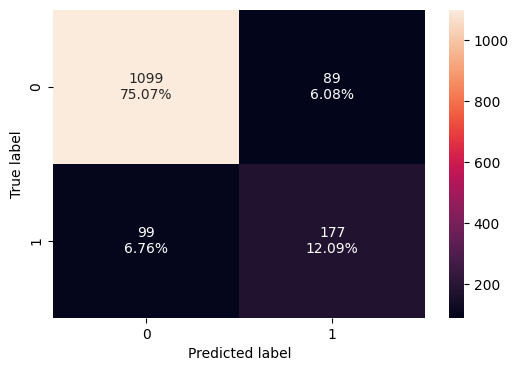

In [ ]:
#Confusion matrix for test data
confusion_matrix_sklearn(d_tree,X_test,y_test)

#MODEL IMPROVMENT:DECISION TREE

In [ ]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Complete the code to fit the above model on train data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=5,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

**CHECKING MODEL PERFORMANCE ON TRAIN**

In [ ]:
# Complete the code to get the model performance on training data
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n", dtree_estimator_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.803456  0.663551   0.483541  0.559422


**CHECKING MODEL PERFORMANCE ON TEST**

In [ ]:
# Complete the code to get the model performance on test data
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n", dtree_estimator_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.777322  0.652174   0.439024  0.524781


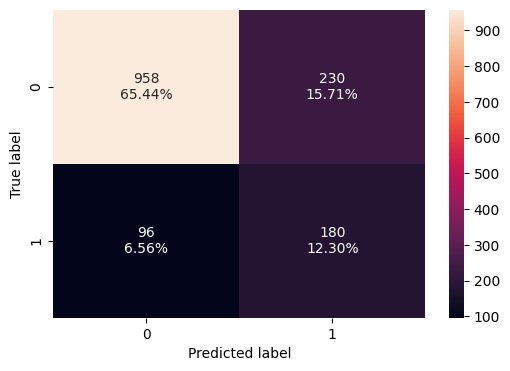

In [ ]:
#Complete the code to get the confusion matrix on test data using the above model
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

#MODEL BUILDING: RANDOM FOREST

In [ ]:
# Initializing the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train) ## Complete the code to fit the above model on train dat

RandomForestClassifier(random_state=1)

**CHECKING MODEL PERFORMANCE ON TRAIN**

In [ ]:
# Complete the code to get the model performance on train data
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


**CHECKING MODEL PERFORMANCE ON TEST**

In [ ]:
# Complete the code to get the model performance on test data
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

Testing performance:
    Accuracy   Recall  Precision        F1
0  0.894126  0.51087   0.875776  0.645309


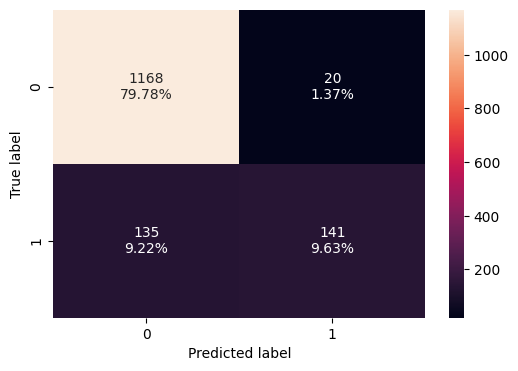

In [ ]:
#Complete the code to get the confusion matrix on test data using the above model
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

#MODEL IMPROVEMENT:RANDOM FOREST

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Complete the code to fit the above model on training data
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=15,
                       max_features=None, min_samples_leaf=11, n_estimators=60,
                       oob_score=True, random_state=1)

**CHECK MODEL PERFORMANCE ON TRAIN**

In [ ]:
# Complete the code to get the model performance on training data
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)

Training performance:
    Accuracy   Recall  Precision       F1
0   0.89133  0.88162   0.657375  0.75316


**CHECK MODEL PERFORMANCE ON TEST**

In [ ]:
# Complete the code to get the model performance on test data
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.814891  0.663043   0.506925  0.574568


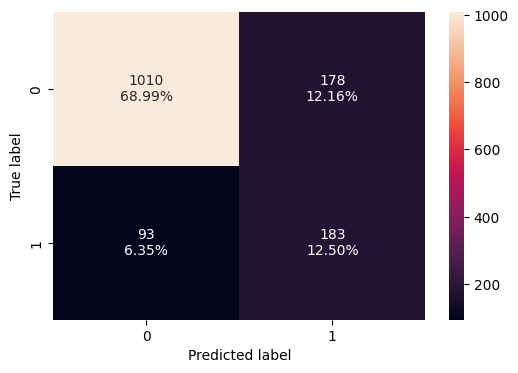

In [ ]:
# Complete the code to get the confusion matrix on test data using the above model
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

#MODEL BUILDING:BAGGING

In [ ]:
# Initializing the Bagging classifier
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)  ## Complete the code to fit the model on training data

BaggingClassifier(random_state=1)

**CHECK MODEL PERFORMANCE ON TRAIN**

In [ ]:
# Complete the code to get the model performance on training data
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.990334  0.951713   0.996737  0.973705


**CHECK MODEL PERFORMANCE ON TEST**

In [ ]:
# Complete the code to get the model performance on test data
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)

Testing performance:
    Accuracy   Recall  Precision        F1
0  0.886612  0.51087   0.819767  0.629464


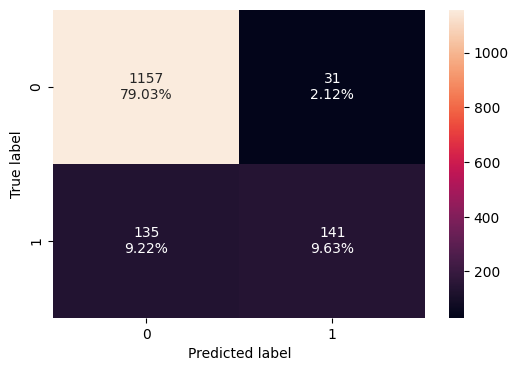

In [ ]:
# Complete the code to get the confusion matrix on test data using the above model
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

#MODEL IMPROMENT:BAGGING

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50]}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Complete the code to fit the above model on training data
bagging_estimator_tuned.fit(X_train,y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

**CHECK MODEL PERFORMANCE ON TRAIN**

In [ ]:
# Complete the code to get the model performance on training data
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999121  0.995327        1.0  0.997658


**CHECK MODEL PERFORMANCE ON TEST**

In [ ]:
# Complete the code to get the model performance on test data
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.900956  0.554348   0.874286  0.678492


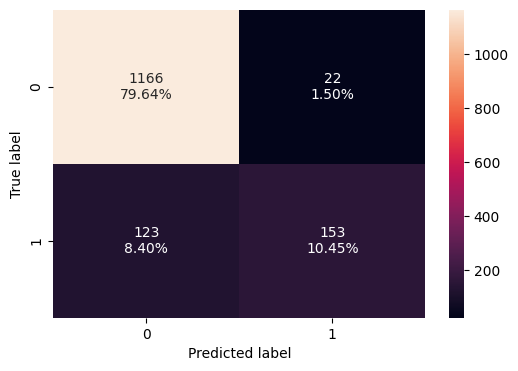

In [ ]:
# Complete the code to get the confusion matrix on test data using the above model
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

#MODEL BUILDING: ADABOOST

In [ ]:
# Initializing the AdaBoost classifier model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)  ## Complete the code to fit the model on training data

AdaBoostClassifier(random_state=1)

**check model performance on train**

In [ ]:
# Complete the code to get the model performance on training data
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print("Training performance:\n",ab_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.845343  0.299065   0.711111  0.421053


**check model performance on test**

In [ ]:
# Complete the code to get the model performance on test data
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print("Testing performance:\n",ab_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.842213  0.282609   0.702703  0.403101


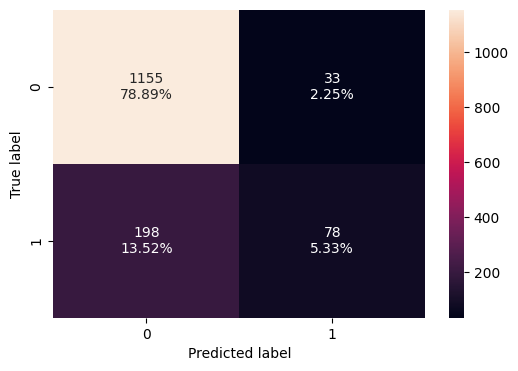

In [ ]:
# Complete the code to get the confusion matrix on test data using the above model
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

#MODEL IMPROVEMENT: ADABOOST

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Complete the code to fit the above model on training data
abc_tuned.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.2000000000000002, n_estimators=100,
                   random_state=1)

**CHECK MODEL PERFORMANCE ON TRAIN**

In [ ]:
# Complete the code to get the model performance on training data
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance:\n",abc_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.98389  0.929907   0.983526  0.955965


**CHECK MODEL PERFORMANCE ON TEST**

In [ ]:
# Complete the code to get the model performance on test data
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance:\n",abc_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.858607  0.539855   0.650655  0.590099


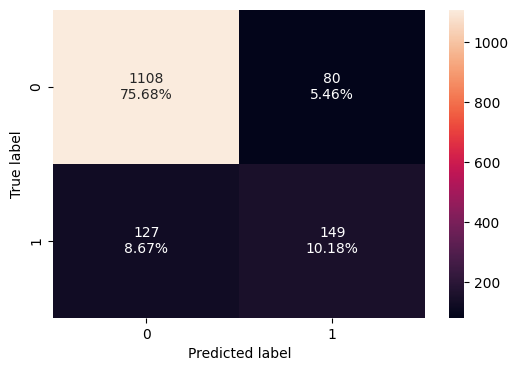

In [ ]:
# Complete the code to get the confusion matrix on test data using the above model
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

#MODEL BUILDING: GRADIENT BOOSTING

In [ ]:
# Initializing the Gradient bossting classifier
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train) ## Complete the code to fit the model on training data

GradientBoostingClassifier(random_state=1)

**CHECK MODEL PERFORMANCE ON TRAIN**

In [ ]:
# Complete the code to get the model performance on training data
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.878735  0.433022   0.847561  0.573196


**CHECK MODEL PERFORMANCE ON TEST**

In [ ]:
# Complete the code to get the model performance on test data
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.861339  0.373188   0.774436  0.503667


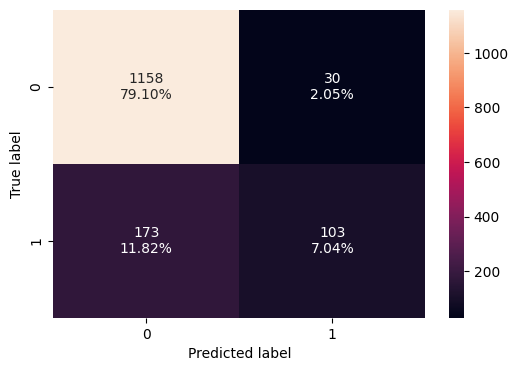

In [ ]:
# Complete the code to get the confusion matrix on test data using the above model
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

#MODEL IMPROVEMENT: GRADIENT BOOSTING

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Complete the code to fit the above model on training data
gbc_tuned.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.8)

**CHECKING MODEL PERFORMANCE ON TRAIN**

In [ ]:
# Complete the code to get the model performance on training data
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.910662  0.587227   0.904077  0.711992


**CHECKING MODEL PERFORMANCE ON TEST**

In [ ]:
# Complete the code to get the model performance on test data
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.867486  0.460145   0.738372  0.566964


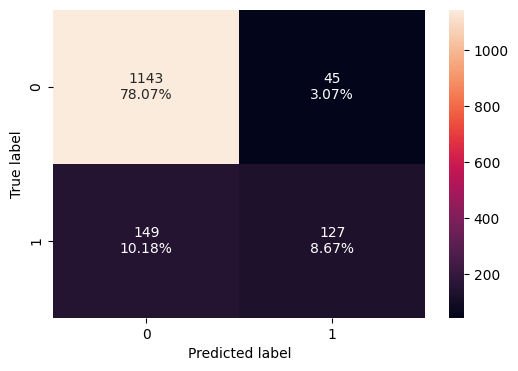

In [ ]:
# Complete the code to get the confusion matrix on test data using the above model
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

#MODEL BUILDING:STACKING

In [ ]:
# Initializing different models
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = gb_classifier

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)  ## Complete the code to fit the model on training data

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=15,
                                                       max_features=None,
                                                       min_samples_leaf=11,
                                                       n_estimators=60,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.18,
                                                                     1: 0.72},
                                                       max_depth=5,
                                                       max_leaf_nodes=15,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_leaf=10,
                                                       random_state=1))],
                   final_estimator=GradientBoostingClassifier(random_state=1))

**CHECKING MODEL PERFORMANCE ON TRAIN**

In [ ]:
# Complete the code to get the model performance on training data
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.927358  0.728972   0.863469  0.790541


**CHECKING MODEL PERFORMANCE ON TEST**

In [ ]:
# Complete the code to get the model performance on test data
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.860656  0.507246   0.673077  0.578512


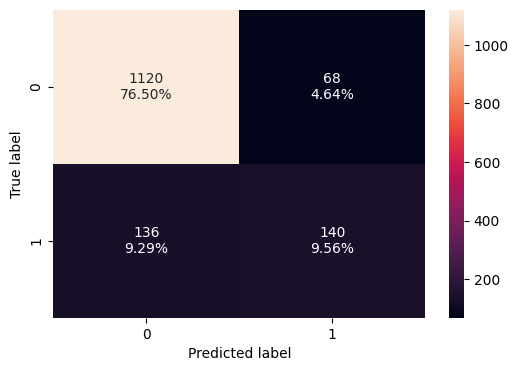

In [ ]:
# Complete the code to get the confusion matrix on test data using the above model
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

#MODEL COMPARISON AND FINAL MODEL SELECTION

In [ ]:
# Model performance comparison for training data

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T, dtree_estimator_model_train_perf.T, rf_estimator_model_train_perf.T,
    rf_tuned_model_train_perf.T,bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T, stacking_classifier_model_train_perf.T],
    axis=1)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
     "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.803456,1.0,0.891330,0.990334,0.999121,0.845343,0.983890,0.878735,0.910662,0.927358
Recall,1.0,0.663551,1.0,0.881620,0.951713,0.995327,0.299065,0.929907,0.433022,0.587227,0.728972
Precision,1.0,0.483541,1.0,0.657375,0.996737,1.000000,0.711111,0.983526,0.847561,0.904077,0.863469
F1,1.0,0.559422,1.0,0.753160,0.973705,0.997658,0.421053,0.955965,0.573196,0.711992,0.790541


In [ ]:
# Model performance comparison for test data

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T, dtree_estimator_model_test_perf.T, rf_estimator_model_test_perf.T,
    rf_tuned_model_test_perf.T,bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T, stacking_classifier_model_test_perf.T],
    axis=1)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
     "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,Stacking Classifier
Accuracy,0.871585,0.777322,0.894126,0.814891,0.886612,0.900956,0.842213,0.858607,0.861339,0.867486,0.860656
Recall,0.641304,0.652174,0.510870,0.663043,0.510870,0.554348,0.282609,0.539855,0.373188,0.460145,0.507246
Precision,0.665414,0.439024,0.875776,0.506925,0.819767,0.874286,0.702703,0.650655,0.774436,0.738372,0.673077
F1,0.653137,0.524781,0.645309,0.574568,0.629464,0.678492,0.403101,0.590099,0.503667,0.566964,0.578512


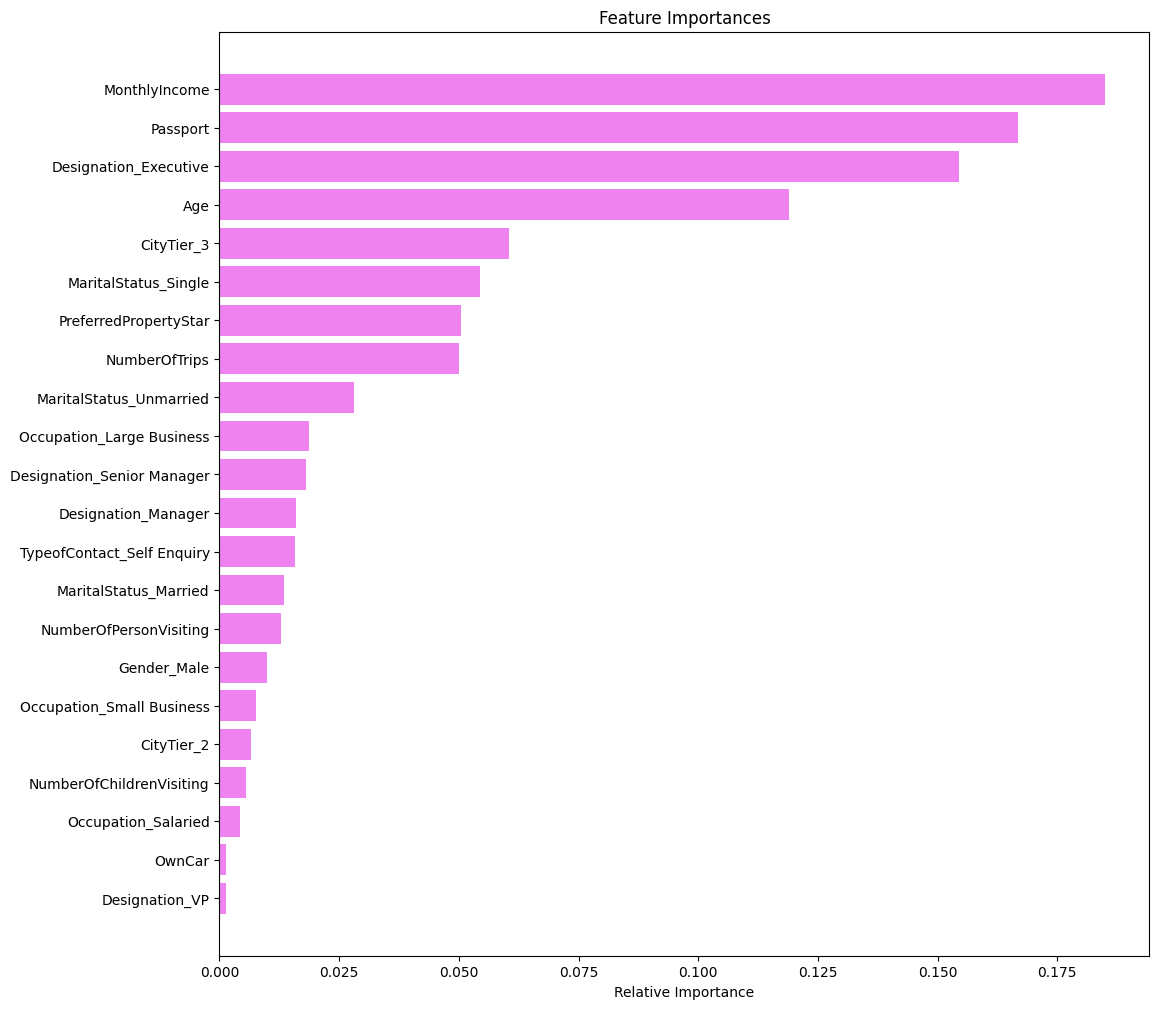

In [ ]:
feature_names = X_train.columns
importances = final_estimator.feature_importances_  ### Complete the code to fill in the variable name for the final model chosen
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()